In [1]:
# Nessessary imports
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import joblib

## Loading/Choosing Features

In [2]:
# loading the cleaned dataset

# Construct path
data_path = os.path.join("..", "data", "insurance_cleaned.csv")
df_cleaned = pd.read_csv(data_path)

df_cleaned.head()

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
0,19,27,0,16884,0,0,0,1,1
1,18,33,1,1725,1,0,1,0,0
2,28,33,3,4449,1,0,1,0,0
3,33,22,0,21984,1,1,0,0,0
4,32,28,0,3866,1,1,0,0,0


In [3]:
# Choosing the x and y features
X = df_cleaned.drop('charges', axis=1)
y = df_cleaned['charges']

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression Model

### Train/Predict/Evaluate

In [4]:
# Model training and prediction

# Model fitting
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model prediction
y_pred = lr_model.predict(X_test)
y_pred_train = lr_model.predict(X_train)

# Saving the model
joblib.dump(lr_model, '../models/lr_model.pkl')

['../models/lr_model.pkl']

In [5]:
# Model evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2 Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

R^2 Score: 0.78
Mean Absolute Error: 4176.27
Root Mean Squared Error: 5793.66


#### Observation
The linear regression model did a pretty solid job. It got an R² of about 0.78, which means it was able to explain most of the variation in medical charges. On average, the predictions were off by around $4,176 and the RMSE was a bit higher at $5,794. This was probably because of some bigger outliers in the data.

Overall, not bad for a first model! There's definitely room to improve though, especially by trying models that can handle non-linear stuff better, like Random Forest or something similar.

### Plotting Actual vs Predicted Medical Charges Of Linear Regression

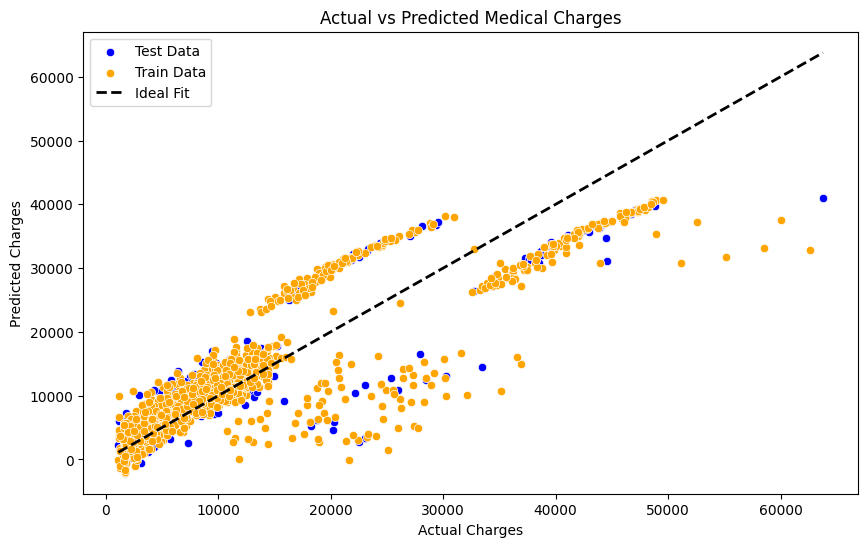

In [6]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Test Data')
sns.scatterplot(x=y_train, y=y_pred_train, color='orange', label='Train Data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Medical Charges')
plt.legend()
plt.show()

#### Observation
This plot shows that the model is doing a solid job overall. Most predictions are close to the actual charges, especially in the mid-range. The train set fits really well, and the test set does a good job too, though it looks like the model tends to underestimate higher charges. That makes sense since linear regression doesn’t always capture complex patterns or outliers. This gives a good starting point, but trying a more flexible model like Random Forest might help catch those higher values better.


## Random Forest Model

### Train/Predict/Evaluate

In [7]:
# Fitting a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model prediction
y_pred_rf = rf_model.predict(X_test)
y_pred_train_rf = rf_model.predict(X_train)

# Saving the model
joblib.dump(rf_model, '../models/rf_model.pkl')

['../models/rf_model.pkl']

In [8]:
# Model evaluation
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"R^2 Score: {r2_rf:.2f}")
print(f"Mean Absolute Error: {mae_rf:.2f}")
print(f"Root Mean Squared Error: {rmse_rf:.2f}")

R^2 Score: 0.86
Mean Absolute Error: 2718.83
Root Mean Squared Error: 4703.71


#### Observation
The Random Forest model performed way better than linear regression. The R² improved from 0.78 to 0.86, which means it explains more of the variation in the charges. The MAE and RMSE also went down, showing that the predictions are more accurate overall and even the bigger errors are smaller. This makes sense since Random Forest can handle non-linear relationships and interactions better than a simple linear model.

### Plotting Actual vs Predicted Medical Charges Of Random Forest

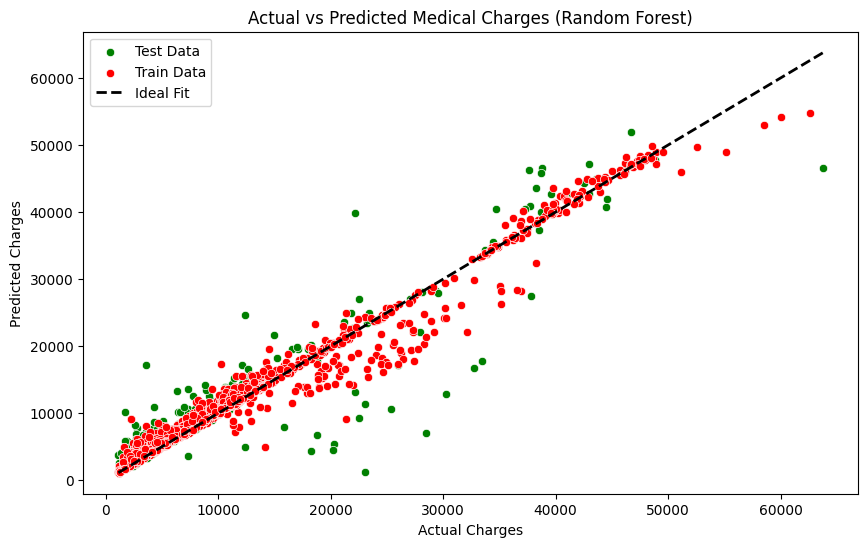

In [9]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='green', label='Test Data')
sns.scatterplot(x=y_train, y=y_pred_train_rf, color='red', label='Train Data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Medical Charges (Random Forest)')
plt.legend()
plt.show()

#### Observation
The Random Forest model makes predictions that are much closer to the actual charges compared to the linear model. Most points fall right along the ideal fit line, especially in the mid to high-cost range. This shows that the model is doing a great job capturing the complex patterns in the data, and it's handling the higher charges way better.

## XGBoost Model

### Train/Predict/Evaluate

In [10]:
# Fitting an XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Model prediction
y_pred_xgb = xgb_model.predict(X_test)
y_pred_train_xgb = xgb_model.predict(X_train)

# Saving the model
joblib.dump(xgb_model, '../models/xgb_model.pkl')

['../models/xgb_model.pkl']

In [11]:
# Model evaluation
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"R^2 Score: {r2_xgb:.2f}")
print(f"Mean Absolute Error: {mae_xgb:.2f}")
print(f"Root Mean Squared Error: {rmse_xgb:.2f}")

R^2 Score: 0.86
Mean Absolute Error: 2665.06
Root Mean Squared Error: 4681.85


#### Observation
XGBoost ended up being the best-performing model overall. It had the same R² score as Random Forest (0.86), but with slightly lower MAE and RMSE values, meaning it made more accurate predictions on average. It also handled outliers and high-cost cases really well, just like Random Forest, but with a little more precision. This makes XGBoost a great final choice for this project.

### Plotting Actual vs Predicted Medical Charges Of XGBoost

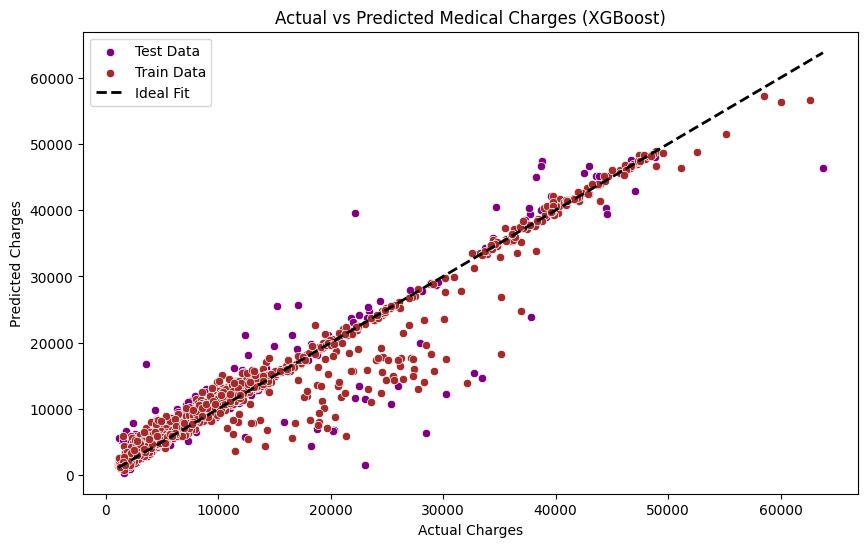

In [10]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, color='purple', label='Test Data')
sns.scatterplot(x=y_train, y=y_pred_train_xgb, color='brown', label='Train Data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Medical Charges (XGBoost)')
plt.legend()
plt.show()

#### Observation
The XGBoost model does a great job predicting charges. Most of the points fall really close to the ideal fit line. Compared to the earlier models, this one looks the cleanest overall, especially for higher charge values where linear regression struggled. The predictions are tighter and more consistent across the full range of costs, showing that XGBoost handles the complexity of the data really well.

## Model Performance Summary 
Here's how the three models compared:

- **Linear Regression** provided a solid baseline but struggled with higher charge values and non-linear patterns.
- **Random Forest** significantly improved accuracy and handled non-linear relationships better.
- **XGBoost** gave the best overall performance, with the lowest MAE and RMSE while matching Random Forest in R² score.

Based on these results, **XGBoost is the best choice** for this dataset. It makes the most accurate predictions and handles the complexity of the features like smoker status and BMI more effectively than the other models.